In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import letters, read_letter_file, taxel_orders
from pathlib import Path
import tqdm

def rect_represetation(count_values):
    x = np.zeros_like(taxel_orders)
    x[count_values[:,0]-1] = count_values[:,1]
    return x.reshape((8,10))

### 1. Prepare the data

In [2]:
data_dir = 'data/'
# letter = 'A'
# i = 0

In [3]:
X = []
Y = []
for letter in tqdm.tqdm(letters.keys()):
    for i in range(50):
        fpath = Path(data_dir)/f'{letter}/{letter}_{i}.csv'
        df = read_letter_file(fpath, True)
        df_sample = df[ ['isPos', 'taxel_id'] ]
        x = rect_represetation(df_sample.groupby('taxel_id').count().reset_index().values)
        X.append(x.flatten())
        y = letters[letter]
        Y.append(y)

100%|██████████| 27/27 [00:03<00:00,  7.14it/s]


In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
X.shape, Y.shape

((1350, 80), (1350,))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)

In [8]:
X_train.shape, X_test.shape

((945, 80), (405, 80))

### 2. Verify linear seperability with SVM

In [9]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 2, 3, 10]}
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=5)

In [10]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 2, 3, 10]})

In [11]:
clf.best_estimator_

SVC(C=10, kernel='linear')

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report

In [14]:
print( classification_report(y_test, y_pred, target_names=letters.keys()) )

              precision    recall  f1-score   support

           A       0.36      0.53      0.43        15
           B       0.43      0.40      0.41        15
           C       0.57      0.53      0.55        15
           D       0.62      0.87      0.72        15
           E       0.54      0.87      0.67        15
           F       0.64      0.93      0.76        15
           G       0.46      0.40      0.43        15
           H       0.29      0.33      0.31        15
           I       0.43      0.67      0.53        15
           J       0.43      0.40      0.41        15
           K       0.67      0.40      0.50        15
           L       0.76      0.87      0.81        15
           M       0.90      0.60      0.72        15
           N       1.00      0.87      0.93        15
           O       0.62      0.53      0.57        15
           P       0.79      0.73      0.76        15
           Q       0.60      0.60      0.60        15
           R       0.71    

In [15]:
from sklearn.metrics import plot_confusion_matrix

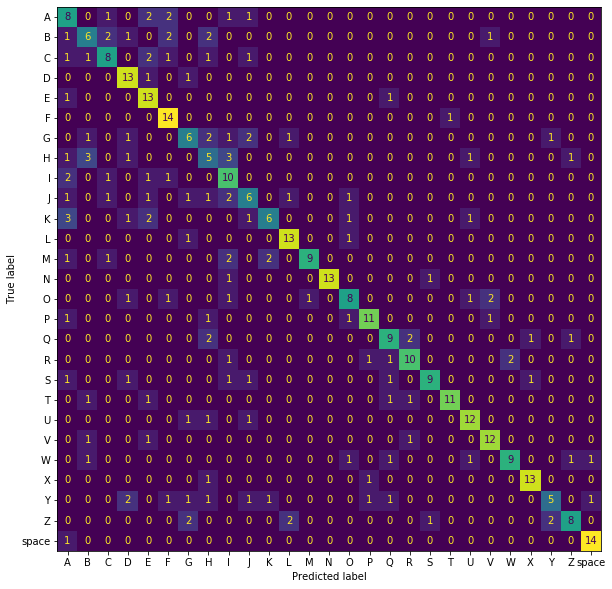

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax, colorbar=False, display_labels=letters.keys())
plt.savefig('svm_spike_counts.png')

### 3. Are interspike times are linearly seperable?

In [17]:
def rect_represetation2(count_values):
    x = np.zeros_like(taxel_orders).astype(np.float)
    taxel_ids = np.copy(count_values[:,0]).astype(int) -1 
    x[taxel_ids] = count_values[:,1]
    return x.reshape((8,10))

In [18]:
X = []
Y = []
for letter in tqdm.tqdm(letters.keys()):
    for i in range(50):
        fpath = Path(data_dir)/f'{letter}/{letter}_{i}.csv'
        df = read_letter_file(fpath, True)
        df  = df.assign(delta = df.timestamp.diff())
        df_sample = df[ ['delta', 'taxel_id'] ]
        x = rect_represetation(df_sample.groupby('taxel_id').count().reset_index().values)
        X.append(x.flatten())
        y = letters[letter]
        Y.append(y)

100%|██████████| 27/27 [00:04<00:00,  6.24it/s]


In [19]:
X = np.array(X)
Y = np.array(Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100, stratify=Y)
X_train.shape, X_test.shape

((945, 80), (405, 80))

In [20]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.1, 1, 2, 3, 10]}
svc = svm.SVC(kernel='linear')
clf = GridSearchCV(svc, parameters, cv=5)

In [21]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 2, 3, 10]})

In [22]:
clf.best_estimator_

SVC(C=0.1, kernel='linear')

In [23]:
y_pred = clf.predict(X_test)
print( classification_report(y_test, y_pred, target_names=letters.keys()) )

              precision    recall  f1-score   support

           A       0.35      0.60      0.44        15
           B       0.50      0.53      0.52        15
           C       0.59      0.67      0.62        15
           D       0.57      0.87      0.68        15
           E       0.67      0.93      0.78        15
           F       0.76      0.87      0.81        15
           G       0.50      0.60      0.55        15
           H       0.50      0.33      0.40        15
           I       0.60      0.80      0.69        15
           J       0.27      0.27      0.27        15
           K       0.54      0.47      0.50        15
           L       0.75      0.80      0.77        15
           M       1.00      0.60      0.75        15
           N       0.87      0.87      0.87        15
           O       0.80      0.53      0.64        15
           P       0.69      0.73      0.71        15
           Q       0.67      0.67      0.67        15
           R       0.62    

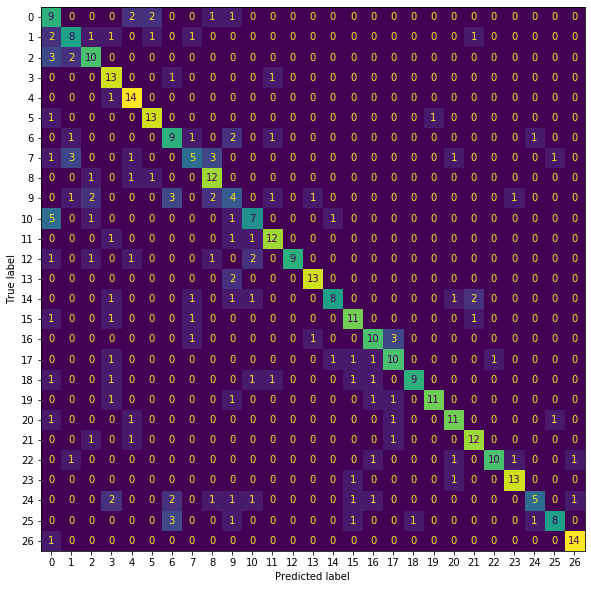

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(clf, X_test, y_test, ax=ax, colorbar=False)